## 1. Olasılıksal Süreç (Stochastic Process)

$t$(zaman) ile indekslenmiş $\{Y_t:t\in T\}$ ile gösterilen tek deşkenli rassal değişkenler kümesine **zaman serisi** ya da **olasılıksal (stochastic) süreç** adı verilir. İndeks kümesi sonlu ya da sonsuz, sürekli ya da kesikli olabilir. Zaman indeksi kümesinin de birbirine eşit uzaklıkta değerlerden oluştuğu düşünülür ancak bu şart değildir. Biz burada aksi belirtilmedikçe $t_i$ değerlerinin eşit uzaklıklı olduğunu varsayacağız. Zamanın reel sayı olduğu sürekli zaman ile indekslenmiş rassal değişkenleri kümesini $\{X(t), t \in T\}$ ile göstereceğiz.

Kesikli zaman için indeks kümesi $T=\{0,\pm 1, \pm 2, \dots \}$ ve sürekli zaman için $T=\{-\infty<t<\infty\}$ olarak tanımlanacaktır. Olasılıksal sürecin belirli bir gerçekleşmesini (realizasyonunu) $\{y_t:t=1,2,\dots,T\}$ ya da $\{y_t\}_{t_1}^{T}$ ile göstereceğiz. t zamanında gözlemlenen değerler skalar (univariate) ya da vektör değerli (multivariate) olabilir. Yukarıda yaptığımız zaman serisi tanımında her $t$ zamanında bir rassal değişkenin gözlemlendiğini ve belirli bir süre sonra bu değerlerin tarihinden hareketle bir gözlem kümesinin ortaya çıktığını söyledik. Açıktır ki bu zaman serisinin olasılık yasalarıyla uyumlu bir şekilde ortaya çıkmasını gerektirir.

$Y$’nin sürekli, $t$’nin ise kesikli olduğunu varsayarsak her t zamanındaki değer için bir marjinal olasılık yoğunluk fonksiyonu tanımlanabilir:

$f(y_t) \ge 0$ 
<br><br>
$\int_{-\infty}^{+\infty} f(y_t)dy_t = 1$

Marjinal yoğunluktan hareketle, eğer tanımlanabiliyorsa, zaman serisinin ortalama fonksiyonu tanımlanabilir:

$\mu_t \equiv E(Y_t) = \int_{-\infty}^{+\infty} y_t f(y_t) dy_t$

Burada her $t$ zamanında aynı yoğunluk fonksiyonundan sayıların çekildiği varsayılmıştır. Başka bir ifadeyle, zaman serisi türdeş dağılmıştır.

## 2. Beklenen Değer (Expected Value) ve Değişinti (Variance)

Zaman serisinin koşulsuz varyansı ise aşağıdaki gibi tanımlanabilir:

$\gamma_{0t} = E[(Y_t-\mu_t)^2] = \int_{-\infty}^{+\infty}(y_t-\mu_t)^2 f(y_t)dy_t$

$\{Y_t:t\in T\}$ gibi bir zaman serisinin ortak yoğunluk fonksiyonu ise her t zamanında belirli değerleri aşmama olasılığı olarak tanımlanabilir:

$F(y_1, y_2, \dots, y_T) = P(Y_1 \ge y_1, Y_2 \ge y_2, \dots, Y_T \ge y_T)$

**Zaman serisi değerleri arasındaki bağımlılık genellikle bu ortak yoğunluk fonksiyonunun açıkça yazılabilmesine izin vermez.**

Eğer rassal değişkenlerin birbirinden bağımsız ve türdeş dağıldığı biliniyorsa, bağımsızlık özelliğinden hareketle, ortak yoğunluk fonksiyonu marjinal yoğunlukların çarpımı olarak yazılabilir.

$F(y_1, y_2, \dots, y_T) = \Pi_{t=1}^{T} f(y) dy $

#### Örnek: İki Zar Atımı Deneyi



Her $t$ zamanında iki zarın atıldığını ve $Y_t$’nin bu zarların toplamını gösterdiğini düşünelim. Bu durumda $Y_t$’nin alabileceği değerler ${2,3,\dots, 12}$ olacaktır. 
$T=100$ için bu deneyin tekrarlandığını düşünelim. Şekil bu deneyin bir realizasyonunu göstermektedir.

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$Y_{t}$')

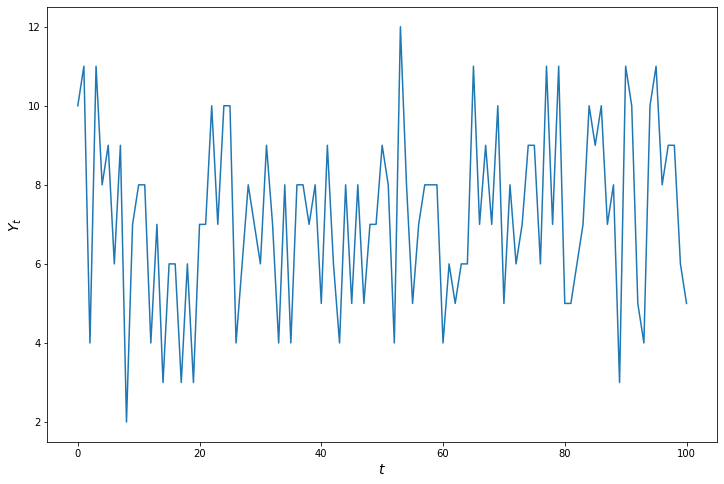

In [10]:
def roll_dice():
    return random.randint(1,6)

T = 100
output = []
order = []

for time in range(101):
    event = roll_dice() + roll_dice()
    output.append(event)
    order.append(time)

plt.figure(figsize=(12,8))
plt.plot(order, output)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$Y_{t}$", fontsize=14)


## 3. Pür Rassal Süreç

$\{\epsilon_{t}: t = 0, 1, 2, \dots \}$ ile gösterilen bir olasılıksal süreç aşağıdaki koşulları sağlıyorsa **pür rassal süreç (white noise process)** adı verilir:

$E[\epsilon_{t}]=0$

$Var(\epsilon_{t}) = \sigma^2$

$Cov(\epsilon_{t}, \epsilon_{s}) = 0, t \neq s$

Bu süreci kısaca $\epsilon_{t} \sim wn(0,\sigma^2)$ ile göstereğiz.

Yukarıdaki koşullara ek olarak $\{\epsilon_{t}\}_{t=1}^{T}$ süreci ortalaması 0 ve değişintisi $\sigma^2$ olan bir normal dağılıma uyuyorsa bu sürece Normal (Gaussian) Pür Rassal Süreç adı verilir ve $\epsilon_{t} \sim GWN(0,\sigma^2)$ ile gösterilir. Eğer türdeş ve bağımsız (iid) dağılyorsa kısaca $\epsilon_{t} \sim N(0,\sigma^2)$ 
 iid 
 ile gösterilir.

#### Örnek: Deterministik Doğrusal Trend Süreci

Eğimleri farklı iki doğrusal trend serisini aşağıdaki eşitliğe göre çizelim:

$y_t = \beta_0 + \beta_1 t + \epsilon_{t}, \epsilon_{t} \sim wn(0,\sigma^2)$

In [11]:
import numpy as np

Text(0, 0.5, '$Y_{t}$')

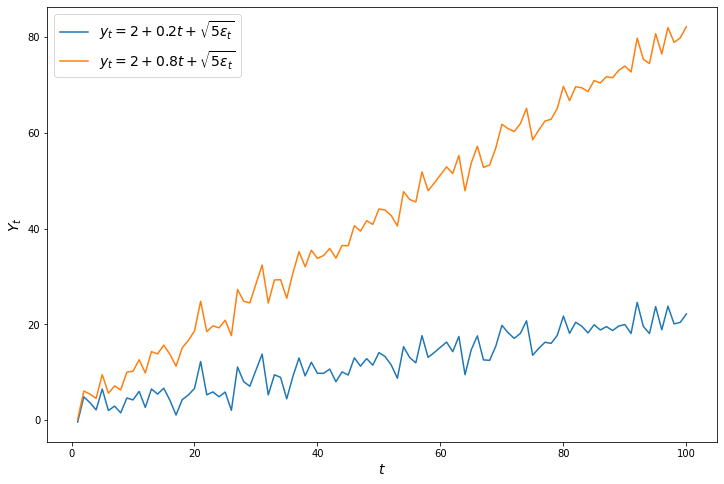

In [15]:
#Parameters
mean = 0
variance = 1
sample_size = 100
error = np.random.normal(mean, variance, size=sample_size)
time_index = []

for t in range(1, 101):
    time_index.append(t)

beta0 = 2
beta11 = 0.2
beta21 = 0.8

y1 = beta0 + beta11 * np.array(time_index) + np.sqrt(5) * error
y2 = beta0 + beta21 * np.array(time_index) + np.sqrt(5) * error

plt.figure(figsize=(12,8))
plt.plot(time_index, y1, label="$y_{t}=2+0.2 t+\sqrt{5 \epsilon_{t}}$")
plt.plot(time_index, y2, label="$y_{t}=2+0.8 t+\sqrt{5 \epsilon_{t}}$")
plt.legend(fontsize=14)
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$Y_{t}$", fontsize=14)